---

<br>
<h1><center>Neural Networks on CIFAR-10 Dataset</center></h1>

---

This notebook provides some implementations of Artificial Neural Networks on CIFAR-10 dataset.

# Overview:



Many different models have been tested applying different set of techniques in order to improve accuracy:
<a id='top'></a>
  
| <div style="text-align: center">Model  </div>       | Accuracy (%)           | Loss  |  # Parameters  | # Dense layers | # Convol. layers | Reg. Type
| ------------- |:-------------:| -----:|
|  <div style="text-align: left"> 1. Single-Layer Perceptron     [<a href='#slp'>Comments</a>] </div>|<center>40.12</center> | 1.7347</center> |30,730 |1 |- |<center> No</center> |
| <div style="text-align: left"> 2. Multi-Layer Perceptron </div>||||| ||
| <div style="text-align: left"> <ul>2.1. Fully connected layers [<a href='#mlp'>Comments</a>] </ul> </div>|<center>47.38</center>|1.4854</center> |1,313,710 |4 |- |<center> No</center>|
| <div style="text-align: left"><ul> 2.2. Switched to Leaky ReLU [<a href='#lkr'>Comments</a>] </ul> </div>|<center>51.72</center>|1.4213</center> |1,313,710 |4|- |<center> No</center>|
| <div style="text-align: left"> <ul>2.3. Added more layers [<a href='#ml'>Comments</a>] </ul></div>|<center>49.77</center>|    <center>1.4359</center> |1,394,210 |6 |- |<center> No</center> |
| <div style="text-align: left"> <ul>2.4. With regularization [<a href='#reg1'>Comments</a>]</ul></div>|<center>46.70</center>    |<center>1.9480</center> |1,331,910 |4 |- |<center> Batch Normalization</center> |
| <div style="text-align: left"> <ul>2.5. With regularization [<a href='#reg2'>Comments</a>]</ul></div> |<center>54.11</center> | <center>1.3409</center> |1,313,710 |4 |- |<center> Data Augmentation</center> |
| <div style="text-align: left"> 3. Convolutional Neural Network </div>|    | | | | ||
| <div style="text-align: left"> <ul>3.1. Multi-layer convolutional neural network [<a href='#mlc'>Comments</a>]</ul> </div>|  <center>69.61</center>    |<center>2.0431</center> |936,010 |2 |2 |<center> No</center>|
| <div style="text-align: left"> <ul> 3.2. Added more layers [<a href='#mlc2'>Comments</a>]</ul></div>   |  <center>72.83</center>    |<center>1.5127</center>|225,034 |2 |3 |<center> No</center> |
| <div style="text-align: left"> <ul> 3.2. With regularization [<a href='#estop'>Comments</a>]</ul></div>   |  <center>75.01</center>   |<center>0.7725</center>|225,034 |2 |3 |<center> Early stopping</center> |
| <div style="text-align: left"> <ul> 3.3. With increased regularization [<a href='#ireg'>Comments</a>]</ul></div>   |  <center>74.78</center>    |<center>0.7469</center>|225,034 |2 |3 |<center> Early stopping & Dropout</center> |
| <div style="text-align: left"> <ul>3.4.'LeNet-5' type with regularization [<a href='#test'>Comments</a>] </ul></div>   | <center>52.40</center>    |<center>1.5309</center>|121,182 |3 |2 |<center> Weight decay (L2)</center> |
| <div style="text-align: left"> <ul> 3.5. With mean std. normalization [<a href='#bnorm'>Comments</a>]</ul></div>   | <center>73.92</center>|1.5885</center>|225,034 |2 |3 |<center> No</center> |
| <div style="text-align: left"> <ul> 3.6. Added regularization [<a href='#bnormreg'>Comments</a>] </ul></div>   |  <center>75.62</center>    |<center>0.8183</center>|225,034 |2 |3 |<center> Early stopping</center> |
| <div style="text-align: left"><ul> 3.7.'Network in Network' with mean std. normalization [<a href='#nin'>Comments</a>] </ul></div>   |  <center>80.19</center>    |<center>0.8769</center>|972,658 |0 |9 |<center> Early stopping, Dropout <br>Batch Norm. & Data Augmentation</center> |
| <div style="text-align: left"><ul> 3.8.'VGG-16' architecture with mean std. normalization [<a href='#vgg1'>Comments</a>] </ul></div>   |  <center>81.34</center>    |<center>1.0168</center>|15,001,418 |2 |13 |<center> Early stopping, Dropout <br>Batch Norm. & Data Augmentation</center> |
| <div style="text-align: left"><ul> 3.9.'VGG-16' architecture with mean std. normalization [<a href='#vgg2'>Comments</a>] </ul></div>   |  <center>87.86</center>    |<center>0.9219 </center>|15,001,418|2 |13 |<center> Early stopping, Dropout <br>Batch Norm. & Data Augmentation</center> |



**NOTES:** 
1. All convolutional layers are followed by a Pooling layer (max pooling). 
2. All models have been trained with *batch size*=128.
3. LeNet, VGG-16 and Network in Network architecture's credit goes to their authors (mentioned below).

# Data loading and preprocessing:

In [1]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


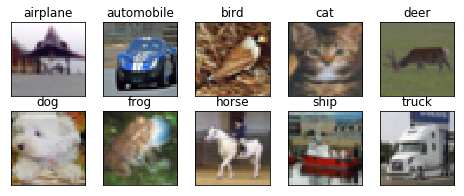

In [3]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

In [4]:
# Data pre-processing 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [6]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [7]:
# Training
import time

def train(nnmodel, batch, epochs, train_XY, validation_XY, test_XY):
    
    start = time.time()
    history = nnmodel.fit(train_XY[0], train_XY[1], batch_size=batch, epochs=epochs, verbose=1, validation_data=validation_XY)
    end = time.time()

    loss, acc = nnmodel.evaluate(test_XY[0], test_XY[1], verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', acc)

    plot_model_history(history)
    print("Training MLP took " + str(end - start) + " seconds")
    

# Model definition and training:

<br>
# 1. Single Layer Perceptron:
*****

In [8]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 132us/step - loss: 1.9297 - acc: 0.3162 - val_loss: 1.8233 - val_acc: 0.3536
Epoch 2/20
50000/50000 [==============================] - 2s 48us/step - loss: 1.8204 - acc: 0.3632 - val_loss: 1.8321 - val_acc: 0.3551
Epoch 3/20
50000/50000 [==============================] - 2s 48us/step - loss: 1.8026 - acc: 0.3702 - val_loss: 1.8084 - val_acc: 0.3670
Epoch 4/20
50000/50000 [==============================] - 2s 48us/step - loss: 1.7752 - acc: 0.3833 - val_loss: 1.8311 - val_acc: 0.3645
Epoch 5/20
50000/50000 [==============================] - 2s 48us/step - loss: 1.7698 - acc: 0.3864 - val_loss: 1.7949 - val_acc: 0.3716
Epoch 6/20
50000/50000 [==============================] - 2s 48us/step - loss: 1.7554 - acc: 0.3938 - val_loss: 1.7904 - val_acc: 0.3796
Epoch 7/20
50000/50000 [==============================] - 2s 48us/step - loss: 1.7516 - acc: 0.3920 - val_loss: 1.8256 - val_ac

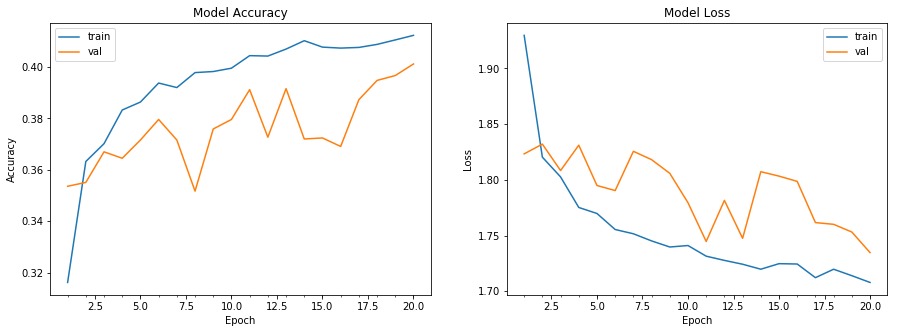

Training MLP took 52.01707720756531 seconds


In [9]:
train(model, 128, 20, (X_train, Y_train),(X_test, Y_test),(X_test, Y_test))

<a id='slp'></a>
**Comments:** 
<br>
The results indicate that there is a great margin of improvement. Single layer perceptrons do not benefit from the non-linearity effects that multilayer neural networks provide. Future models will increase number of parameters and reduce loss.


<br>

[<a href='#top'>Return to top</a>]

**Note:** The previous model has been validated over the **testing data**, providing biased accuracy results. The **training data** has been further split into training (80%) and **validation data** (20%). This will also increase generalization error, due to the reduction of sample data in the training process. Therefore this split will be used occasionally but not in all models.

In [13]:
from sklearn.model_selection import train_test_split

t_X, val_X, t_y, val_y = train_test_split(X_train,Y_train,train_size=0.80, random_state=0)

C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [40]:
split={'train_data':(t_X,t_y),'  val_data':(val_X,val_y),' test_data':(X_test,Y_test)}

for i in split:
    print( i,'---> size:', np.array(split[i][0]).shape)

train_data ---> size: (40000, 32, 32, 3)
  val_data ---> size: (10000, 32, 32, 3)
 test_data ---> size: (10000, 32, 32, 3)


# 2. Multi-Layer Perceptron:
*****

## 2.1. Added Layers + incorporated ReLU activation function:

In [8]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU, ReLU


model3 = Sequential()
model3.add(Flatten(input_shape=(32, 32, 3)))
model3.add(Dense(400))
model3.add(ReLU())
model3.add(Dense(100))
model3.add(Activation('linear'))
model3.add(Dense(400))
model3.add(ReLU())
model3.add(Dense(10))
model3.add(Activation('softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               1229200   
_________________________________________________________________
re_lu_1 (ReLU)               (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               40100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               40400     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 400)               0         
__________

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 3s 76us/step - loss: 1.8800 - acc: 0.3202 - val_loss: 1.6974 - val_acc: 0.3860
Epoch 2/10
40000/40000 [==============================] - 3s 64us/step - loss: 1.6915 - acc: 0.3932 - val_loss: 1.6517 - val_acc: 0.4049
Epoch 3/10
40000/40000 [==============================] - 3s 64us/step - loss: 1.5962 - acc: 0.4303 - val_loss: 1.6192 - val_acc: 0.4170
Epoch 4/10
40000/40000 [==============================] - 3s 65us/step - loss: 1.5377 - acc: 0.4497 - val_loss: 1.5499 - val_acc: 0.4481
Epoch 5/10
40000/40000 [==============================] - 3s 65us/step - loss: 1.4949 - acc: 0.4637 - val_loss: 1.5124 - val_acc: 0.4627
Epoch 6/10
40000/40000 [==============================] - 3s 65us/step - loss: 1.4654 - acc: 0.4768 - val_loss: 1.4923 - val_acc: 0.4691
Epoch 7/10
40000/40000 [==============================] - 3s 66us/step - loss: 1.4305 - acc: 0.4882 - val_loss: 1.5122 - val_acc

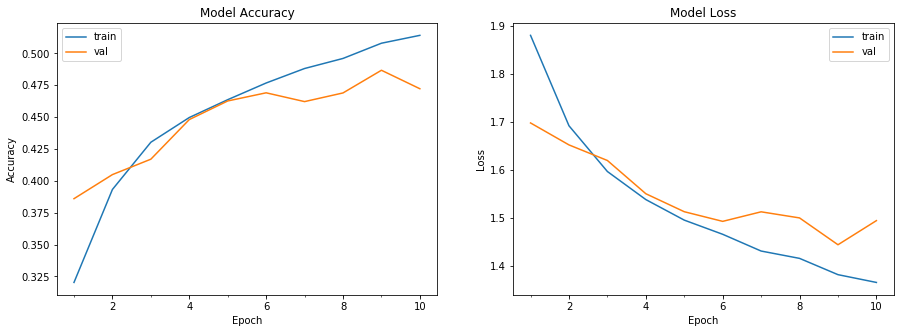

Training MLP took 26.67871856689453 seconds


In [46]:
train(model3, 128, 10, (t_X,t_y),(val_X,val_y),(X_test, Y_test))

<a id='mlp'></a>
**Comments:** 
<br>
* Substantial mprovement has been achieved (7%) compared to a single layer perceptron. The benefits from non-linearity eand ReLU activation functions is noticeable.
<br>
* ReLU has been chosen as having only linear activation functions in a Multilayer Neural Network doesn't help much, as it has the same effect as having a single layer:

<br>
<center>$a^{[2]}$ =$w^{[2]}$  ($w^{[1]}$$·x$+$b^{[2]}$  )+$b^{[2]}$ =$w^{[2]}·w^{[1]}$$·x $+ $w^{[2]}$ ·$b^{[1]}$·$b^{[2]}$ =$W^{'}$$⋅x+b$</center>

<br>

[<a href='#top'>Return to top</a>]

## 2.2. Added LeakyReLU:

In [50]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU, ReLU


model4 = Sequential()
model4.add(Flatten(input_shape=(32, 32, 3)))
model4.add(Dense(400))
model4.add(LeakyReLU(alpha=0.1))
model4.add(Dense(100))
model4.add(LeakyReLU(alpha=0.1))
model4.add(Dense(400))
model4.add(LeakyReLU(alpha=0.1))
model4.add(Dense(10))
model4.add(Activation('softmax'))

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 400)               1229200   
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 400)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               40100     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 400)               40400     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 400)               0         
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 82us/step - loss: 1.3141 - acc: 0.5316 - val_loss: 1.4331 - val_acc: 0.4976
Epoch 2/10
50000/50000 [==============================] - 4s 77us/step - loss: 1.3040 - acc: 0.5347 - val_loss: 1.4900 - val_acc: 0.4788
Epoch 3/10
50000/50000 [==============================] - 4s 78us/step - loss: 1.2775 - acc: 0.5412 - val_loss: 1.4312 - val_acc: 0.4924
Epoch 4/10
50000/50000 [==============================] - 4s 76us/step - loss: 1.2513 - acc: 0.5502 - val_loss: 1.4232 - val_acc: 0.5014
Epoch 5/10
50000/50000 [==============================] - 4s 79us/step - loss: 1.2234 - acc: 0.5585 - val_loss: 1.3743 - val_acc: 0.5192
Epoch 6/10
50000/50000 [==============================] - 4s 75us/step - loss: 1.2052 - acc: 0.5683 - val_loss: 1.3689 - val_acc: 0.5219
Epoch 7/10
50000/50000 [==============================] - 4s 74us/step - loss: 1.1814 - acc: 0.5769 - val_loss: 1.3706 - val_acc

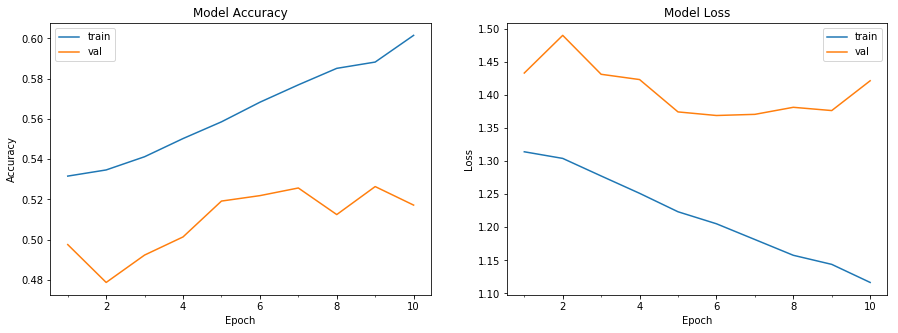

Training MLP took 38.0986762046814 seconds


In [52]:
train(model4, 128, 10, (X_train, Y_train),(X_test, Y_test),(X_test, Y_test))

<a id='lkr'></a>
**Comments:** 
<br>
* Slight improvement has been made (4%) just by switching from ReLU activation function to Leaky Relu.
<br>
* Leaky ReLU avoids non-derivable points and also unlike ReLU, leaky ReLU is more “balanced and may, therefore, learn faster.

<br>

[<a href='#top'>Return to top</a>]

## 2.3. More layers:

In [53]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU, ReLU


model5 = Sequential()
model5.add(Flatten(input_shape=(32, 32, 3)))
model5.add(Dense(400))
model5.add(LeakyReLU(alpha=0.1))
model5.add(Dense(100))
model5.add(LeakyReLU(alpha=0.1))
model5.add(Dense(400))
model5.add(LeakyReLU(alpha=0.1))
model5.add(Dense(100))
model5.add(LeakyReLU(alpha=0.1))
model5.add(Dense(400))
model5.add(LeakyReLU(alpha=0.1))
model5.add(Dense(10))
model5.add(Activation('softmax'))

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 400)               1229200   
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 400)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               40100     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 400)               40400     
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 400)               0         
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s 367us/step - loss: 1.8858 - acc: 0.3067 - val_loss: 1.7465 - val_acc: 0.3669
Epoch 2/10
50000/50000 [==============================] - 4s 84us/step - loss: 1.7065 - acc: 0.3833 - val_loss: 1.6279 - val_acc: 0.4190
Epoch 3/10
50000/50000 [==============================] - 4s 84us/step - loss: 1.6254 - acc: 0.4142 - val_loss: 1.6213 - val_acc: 0.4203
Epoch 4/10
50000/50000 [==============================] - 4s 84us/step - loss: 1.5647 - acc: 0.4349 - val_loss: 1.6121 - val_acc: 0.4213
Epoch 5/10
50000/50000 [==============================] - 4s 82us/step - loss: 1.5175 - acc: 0.4557 - val_loss: 1.5200 - val_acc: 0.4505
Epoch 6/10
50000/50000 [==============================] - 4s 81us/step - loss: 1.4841 - acc: 0.4678 - val_loss: 1.5224 - val_acc: 0.4634
Epoch 7/10
50000/50000 [==============================] - 4s 81us/step - loss: 1.4488 - acc: 0.4794 - val_loss: 1.5074 - val_a

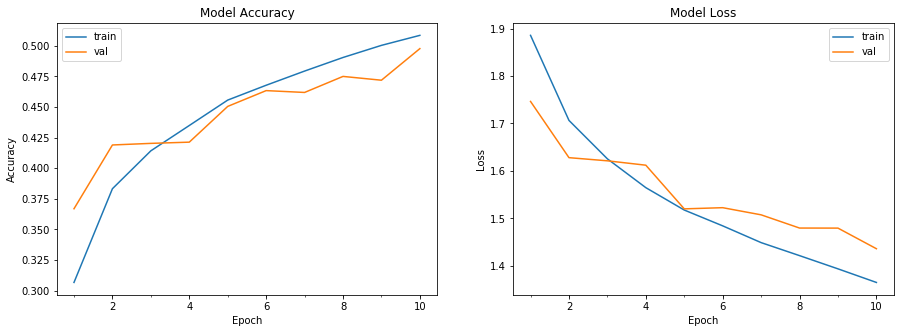

Training MLP took 56.30229663848877 seconds


In [54]:
train(model5, 128, 10, (X_train, Y_train),(X_test, Y_test),(X_test, Y_test))

<a id='ml'></a>
**Comments:** 
<br>
* Adding more layers has worsened the accuracy of the model. There has been an increase on the model's generalization error as it is prone to overfitting. Adding more epochs will most probably provide evidence on overfitting.

<br>

[<a href='#top'>Return to top</a>]


# 2.4. More epochs + batch normalization:

In [73]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.layers.normalization import BatchNormalization


model6 = Sequential()
model6.add(Flatten(input_shape=(32, 32, 3)))
model6.add(Dense(400))
model6.add(BatchNormalization())
model6.add(LeakyReLU(alpha=0.1))
model6.add(Dense(200))
model6.add(BatchNormalization())
model6.add(LeakyReLU(alpha=0.1))
model6.add(Dense(100))
model6.add(BatchNormalization())
model6.add(LeakyReLU(alpha=0.1))
model6.add(Dense(10))
model6.add(Activation('softmax'))

model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 400)               1229200   
_________________________________________________________________
batch_normalization_12 (Batc (None, 400)               1600      
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 400)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_13 (Batc (None, 200)               800       
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 200)               0         
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 216us/step - loss: 1.6158 - acc: 0.4229 - val_loss: 1.7598 - val_acc: 0.3654
Epoch 2/20
50000/50000 [==============================] - 5s 102us/step - loss: 1.3979 - acc: 0.5055 - val_loss: 1.8599 - val_acc: 0.3405
Epoch 3/20
50000/50000 [==============================] - 5s 98us/step - loss: 1.2903 - acc: 0.5409 - val_loss: 1.6513 - val_acc: 0.4217
Epoch 4/20
50000/50000 [==============================] - 5s 99us/step - loss: 1.2102 - acc: 0.5696 - val_loss: 1.7050 - val_acc: 0.4017
Epoch 5/20
50000/50000 [==============================] - 5s 99us/step - loss: 1.1417 - acc: 0.5944 - val_loss: 1.6500 - val_acc: 0.3995
Epoch 6/20
50000/50000 [==============================] - 5s 97us/step - loss: 1.0773 - acc: 0.6169 - val_loss: 1.5744 - val_acc: 0.4430
Epoch 7/20
50000/50000 [==============================] - 5s 98us/step - loss: 1.0244 - acc: 0.6353 - val_loss: 1.5614 - val_

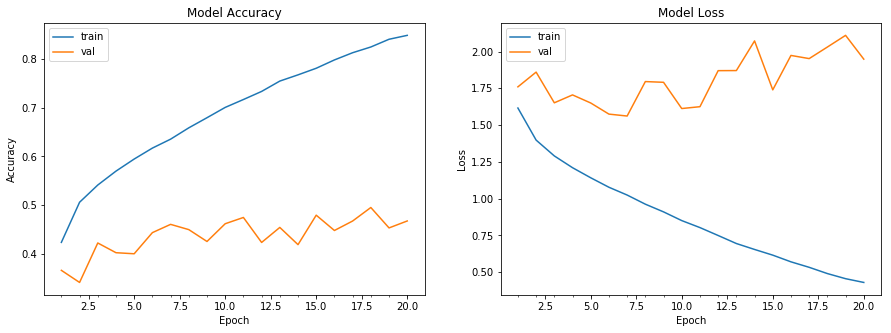

Training MLP took 107.02333927154541 seconds


In [74]:
train(model6, 128, 20, (X_train, Y_train),(X_test, Y_test),(X_test, Y_test))

<a id='reg1'></a>
**Comments:** 
<br>
* As expected, training for a larger number of epochs provides evidence of overfitting. Even adding Batch normalization type regularization has not been able to compensate the high variance. Perhaps a larger quantity of images (Data Augmentation) will help overcome the problem.

<br>

[<a href='#top'>Return to top</a>]

# 2.5. With Data Augmentation:

In [18]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU, ReLU


model7 = Sequential()
model7.add(Flatten(input_shape=(32, 32, 3)))
model7.add(Dense(400))
model7.add(LeakyReLU(alpha=0.1))
model7.add(Dense(100))
model7.add(LeakyReLU(alpha=0.1))
model7.add(Dense(400))
model7.add(LeakyReLU(alpha=0.1))
model7.add(Dense(10))
model7.add(Activation('softmax'))

model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model7.summary()

print('Using real-time data augmentation.')
datagen = ImageDataGenerator(horizontal_flip=True,width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)
datagen.fit(x_train)

# start training
start = time.time()
history = model7.fit_generator(datagen.flow(x_train, Y_train,batch_size=batch_size),steps_per_epoch=iterations,epochs=25,callbacks=callbacks,validation_data=(x_test, Y_test))
model.save('vgg16_2.h5')
end = time.time()

loss, acc = model7.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)
    


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 400)               1229200   
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               40100     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 400)               40400     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 400)               0         
__________

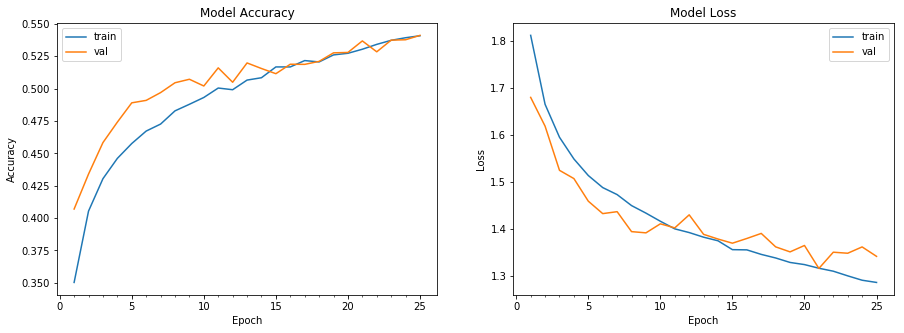

In [19]:
plot_model_history(history)


<a id='reg2'></a>

**Comments:** 
<br>
* As expected Data Augmentation has considerably improved performance, overfitting is no longer the biggest issue. For further improvement Convolutional Neural Networks will be tested.

<br>

[<a href='#top'>Return to top</a>]

# 3. Convolutional Neural Networks:
*****

## 3.1. Multi-layer convolutional neural networks

In [84]:
# Convolutional Neural Networks (CNN)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

model71 = Sequential()
model71.add(Conv2D(64, kernel_size=(7, 7),activation='linear',input_shape=(32,32,3),padding='same'))
model71.add(LeakyReLU(alpha=0.1))
model71.add(MaxPooling2D((2, 2),padding='same'))
model71.add(Conv2D(128, (7, 7), activation='linear',padding='same'))
model71.add(LeakyReLU(alpha=0.1))                  
model71.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model71.add(Flatten())
model71.add(Dense(64, activation='linear'))
model71.add(LeakyReLU(alpha=0.1))                  
model71.add(Dense(num_classes, activation='softmax'))
model71.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model71.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 64)        9472      
_________________________________________________________________
leaky_re_lu_65 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       401536    
_________________________________________________________________
leaky_re_lu_66 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 8192)              0         
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 467us/step - loss: 1.4970 - acc: 0.4637 - val_loss: 1.2187 - val_acc: 0.5706
Epoch 2/20
50000/50000 [==============================] - 18s 354us/step - loss: 1.0937 - acc: 0.6151 - val_loss: 1.0188 - val_acc: 0.6502
Epoch 3/20
50000/50000 [==============================] - 17s 350us/step - loss: 0.9207 - acc: 0.6791 - val_loss: 0.9369 - val_acc: 0.6802
Epoch 4/20
50000/50000 [==============================] - 18s 351us/step - loss: 0.7946 - acc: 0.7221 - val_loss: 0.9209 - val_acc: 0.6812
Epoch 5/20
50000/50000 [==============================] - 17s 349us/step - loss: 0.6881 - acc: 0.7612 - val_loss: 0.9101 - val_acc: 0.6978
Epoch 6/20
50000/50000 [==============================] - 18s 351us/step - loss: 0.5861 - acc: 0.7933 - val_loss: 0.8865 - val_acc: 0.7177
Epoch 7/20
50000/50000 [==============================] - 18s 351us/step - loss: 0.4947 - acc: 0.8277 - val_loss: 0.

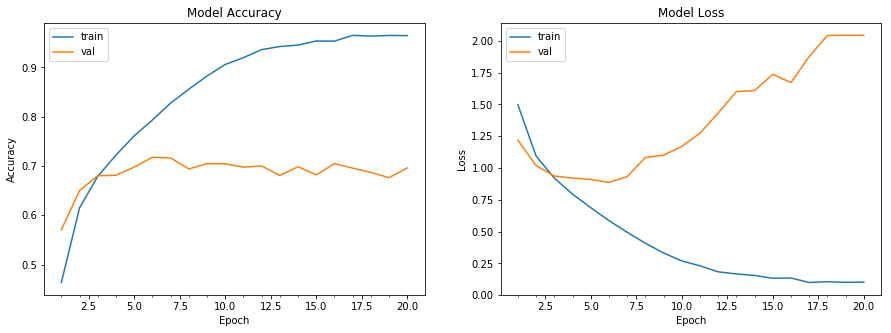

Training MLP took 357.06080746650696 seconds


In [85]:
train(model71, 128, 20, (X_train, Y_train),(X_test, Y_test),(X_test, Y_test))

<a id='mlc'></a>
**Comments:** 
<br>
* First try at convolutional neural network model returns a huge improvement over non-convolutional neural networks.
* Evidence of high variance (overfitting) is present.

<br>

[<a href='#top'>Return to top</a>]

# 3.2. Added more layers

In [78]:
# Convolutional Neural Networks (CNN)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

model8 = Sequential()
#model.add(Flatten(input_shape=(32, 32, 3)))
#model.add(Dense(10))
#model.add(Activation('softmax'))
model8.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model8.add(LeakyReLU(alpha=0.1))
model8.add(MaxPooling2D((2, 2),padding='same'))
model8.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model8.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.2))
model8.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model8.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model8.add(LeakyReLU(alpha=0.1))                  
model8.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model8.add(Flatten())
model8.add(Dense(64, activation='linear'))
model8.add(LeakyReLU(alpha=0.1))                  
model8.add(Dense(num_classes, activation='softmax'))
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 330us/step - loss: 1.5022 - acc: 0.4571 - val_loss: 1.2128 - val_acc: 0.5698A: 3s
Epoch 2/20
50000/50000 [==============================] - 9s 185us/step - loss: 1.0768 - acc: 0.6200 - val_loss: 1.0041 - val_acc: 0.6598oss: 1.1588 - acc: 0 - ETA: 7s - 
Epoch 3/20
50000/50000 [==============================] - 9s 185us/step - loss: 0.8984 - acc: 0.6885 - val_loss: 0.9809 - val_acc: 0.66247s - los - E - ETA: 3s - loss: 0.9164 - acc: 0. - ET - ETA: 1s - loss: 0.9068 - acc: 0.68 - ETA: 1s - loss: 0.9049 - acc: 0 - ETA: 1s - loss: 0.9
Epoch 4/20
50000/50000 [==============================] - 9s 180us/step - loss: 0.7964 - acc: 0.7248 - val_loss: 0.8471 - val_acc: 0.7136: 2s - loss: - ETA: 1s - loss: 0.8022 - acc: 0.723 - ETA: 1s - loss: 0.8017 -  - ETA: 0s - loss: 0.7959 - acc: 0 - ETA: 0s - loss: 0.7951 - acc: 0. - ETA: 0s - loss: 0.7960 - acc: 0
Epoch 5/20
50000/50000 [=========

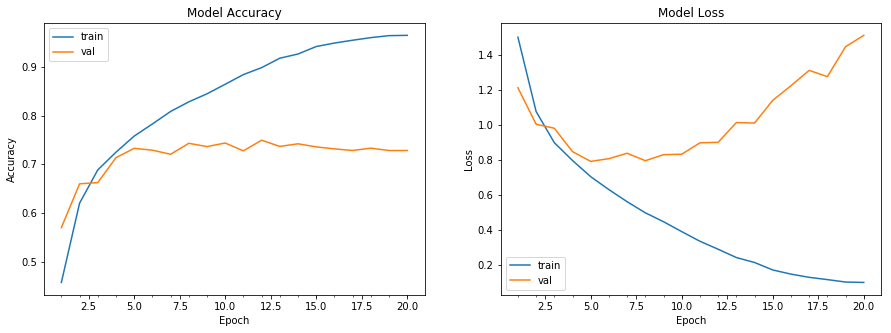

Training MLP took 192.08026480674744 seconds


In [79]:
train(model8, 128, 20, (X_train, Y_train),(X_test, Y_test),(X_test, Y_test))

<a id='mlc2'></a>
**Comments:**
* Before proceding with regularization, in order to reduce overfitting, seeking a better model for the dataset.
* Adding more convolutional indeed increases accuracy and reduces computing time significantly.

<br>

[<a href='#top'>Return to top</a>]

## 3.3. Early Stopping:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_54 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_55 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         73856     
__________

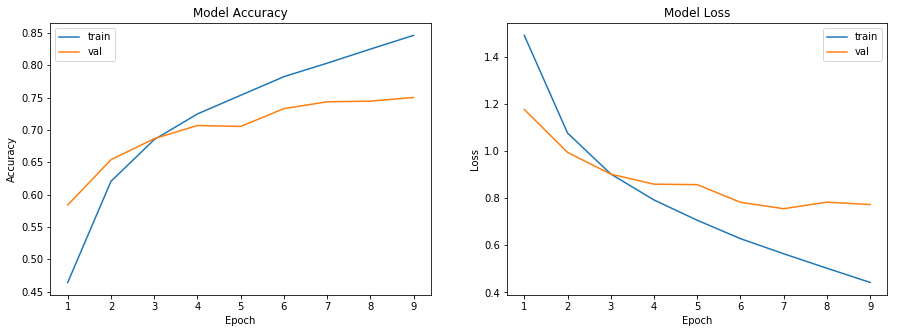

Training MLP took 88.69205069541931 seconds


In [81]:
# Convolutional Neural Networks (CNN)
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=2),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

model9 = Sequential()
#model.add(Flatten(input_shape=(32, 32, 3)))
#model.add(Dense(10))
#model.add(Activation('softmax'))
model9.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model9.add(LeakyReLU(alpha=0.1))
model9.add(MaxPooling2D((2, 2),padding='same'))
model9.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model9.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.2))
model9.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model9.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model9.add(LeakyReLU(alpha=0.1))                  
model9.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model9.add(Flatten())
model9.add(Dense(64, activation='linear'))
model9.add(LeakyReLU(alpha=0.1))                  
model9.add(Dense(num_classes, activation='softmax'))
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model9.summary()
    
start = time.time()
history = model9.fit(X_train, Y_train, batch_size=128,callbacks=callbacks, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model9.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")
    

<a id='estop'></a>
**Comments:**
* Early stopping has reduced overfitting as expected. Early stopping works up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error.
* Additionaly, an improvement on accuracy has been achieved (75%).

<br>

[<a href='#top'>Return to top</a>]

## 3.4. Add Dropout layers:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_68 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_69 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
__________

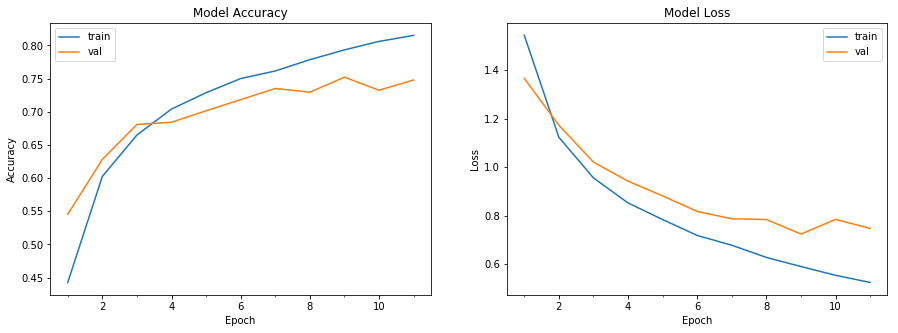

Training MLP took 159.44443082809448 seconds


In [86]:
# Convolutional Neural Networks (CNN)
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=2),ModelCheckpoint(filepath='best_model.h6', monitor='val_loss', save_best_only=True)]

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

model10 = Sequential()
model10.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model10.add(LeakyReLU(alpha=0.1))
model10.add(Dropout(0.2))
model10.add(MaxPooling2D((2, 2),padding='same'))
model10.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model10.add(LeakyReLU(alpha=0.1))
model10.add(Dropout(0.4))
model10.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model10.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model10.add(LeakyReLU(alpha=0.1))
model10.add(Dropout(0.2))
model10.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model10.add(Flatten())
model10.add(Dense(64, activation='linear'))
model10.add(LeakyReLU(alpha=0.1))                  
model10.add(Dense(num_classes, activation='softmax'))
model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model10.summary()
    
start = time.time()
history = model10.fit(X_train, Y_train, batch_size=128,callbacks=callbacks, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model10.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

<a id='ireg'></a>
**Comments:**

* The dropout technique, allows to randomly omit some units of the network when iterating over a minibatch and by doing so, it obtains a different neural net for each minibatch of training data. In this way, because the responsibility of learning to fire for a specific behavior is distributed, the chances of overfitting reduce drastically.
* Three calls for dropout have been called in this model, with probability 0.2. As a result overfitting has been reduced further at the cost of slight accuracy loss.


<br>

[<a href='#top'>Return to top</a>]

## 3.4. LeNet-5 type architecture, with weight decay (L2):

In [21]:
# Convolutional Neural Networks (CNN)
import keras
import numpy as np
from keras import optimizers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2


batch_size    = 128
epochs        = 200
iterations    = 391
num_classes   = 10
weight_decay  = 0.0001

In [34]:
model11 = Sequential()
model11.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay), input_shape=(32,32,3)))
model11.add(MaxPooling2D((2, 2)))
model11.add(Conv2D(32, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay)))
model11.add(MaxPooling2D((2, 2)))
model11.add(Flatten())
model11.add(Dense(120, activation = 'relu', kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay) ))
model11.add(Dense(84, activation = 'relu', kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay) ))
model11.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay) ))
model11.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=.1, momentum=0.9, nesterov=True), metrics=['accuracy'])

model11.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 10, 32)        12832     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 120)               96120     
_________________________________________________________________
dense_44 (Dense)             (None, 84)                10164     
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 181us/step - loss: 2.2380 - acc: 0.1809 - val_loss: 1.9979 - val_acc: 0.2854
Epoch 2/20
50000/50000 [==============================] - 4s 89us/step - loss: 1.8897 - acc: 0.3404 - val_loss: 1.7792 - val_acc: 0.3871
Epoch 3/20
50000/50000 [==============================] - 4s 89us/step - loss: 1.7559 - acc: 0.3964 - val_loss: 1.7832 - val_acc: 0.3930
Epoch 4/20
50000/50000 [==============================] - 4s 89us/step - loss: 1.6775 - acc: 0.4283 - val_loss: 1.7572 - val_acc: 0.3982
Epoch 5/20
50000/50000 [==============================] - 4s 88us/step - loss: 1.6231 - acc: 0.4525 - val_loss: 1.6118 - val_acc: 0.4515
Epoch 6/20
50000/50000 [==============================] - 4s 89us/step - loss: 1.6017 - acc: 0.4669 - val_loss: 1.6218 - val_acc: 0.4659
Epoch 7/20
50000/50000 [==============================] - 4s 88us/step - loss: 1.5619 - acc: 0.4840 - val_loss: 1.6156 - val_ac

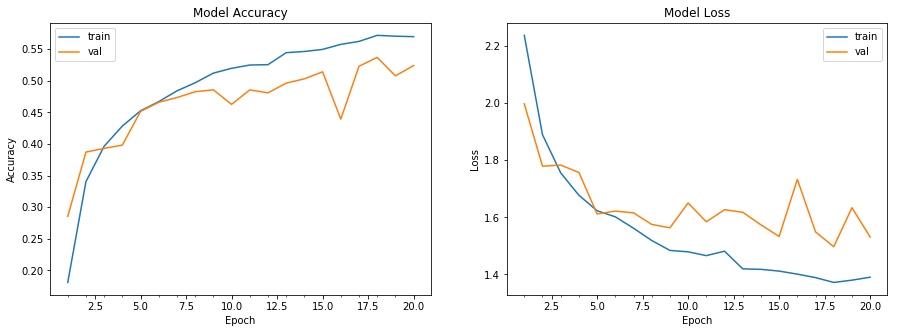

Training MLP took 93.77912092208862 seconds


In [31]:
train(model11, 128, 20,(X_train, Y_train),(X_test, Y_test),(X_test, Y_test))

<a id='test'></a>
**Comments:**
* LeNet-5 type model has been tested. Does not offer improvements on accuracy.
* Lasso L2 regularizer has been tested succesfully.

<br>

[<a href='#top'>Return to top</a>]

# 3.5. Mean standard batch normalization:

In [5]:
#Data preprocessing 2
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
# mean-std normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 

In [59]:
# Convolutional Neural Networks (CNN)
from keras.callbacks import EarlyStopping, ModelCheckpoint


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

model13 = Sequential()
model13.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model13.add(LeakyReLU(alpha=0.1))
model13.add(MaxPooling2D((2, 2),padding='same'))
model13.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model13.add(LeakyReLU(alpha=0.1))
model13.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model13.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model13.add(LeakyReLU(alpha=0.1))                  
model13.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model13.add(Flatten())
model13.add(Dense(64, activation='linear'))
model13.add(LeakyReLU(alpha=0.1))                  
model13.add(Dense(num_classes, activation='softmax'))
model13.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model13.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 8, 8, 128)         73856     
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 17s 342us/step - loss: 1.3380 - acc: 0.5220 - val_loss: 1.0520 - val_acc: 0.630077
Epoch 2/20
50000/50000 [==============================] - 9s 184us/step - loss: 0.9272 - acc: 0.6783 - val_loss: 0.8829 - val_acc: 0.6938 0.9856 -  - ETA: 3 - ETA: 1s - loss: 0.9377 - acc - ETA: 0s - loss: 0.9314 - 
Epoch 3/20
50000/50000 [==============================] - 9s 184us/step - loss: 0.7593 - acc: 0.7355 - val_loss: 0.8126 - val_acc: 0.7226TA: 
Epoch 4/20
50000/50000 [==============================] - 9s 186us/step - loss: 0.6366 - acc: 0.7791 - val_loss: 0.7494 - val_acc: 0.7465- loss: 0.6376 - acc
Epoch 5/20
50000/50000 [==============================] - 9s 187us/step - loss: 0.5449 - acc: 0.8109 - val_loss: 0.7546 - val_acc: 0.7448
Epoch 6/20
50000/50000 [==============================] - 9s 183us/step - loss: 0.4570 - acc: 0.8416 - val_loss: 0.7700 - val_acc: 0.7468loss: 0.4537 - acc

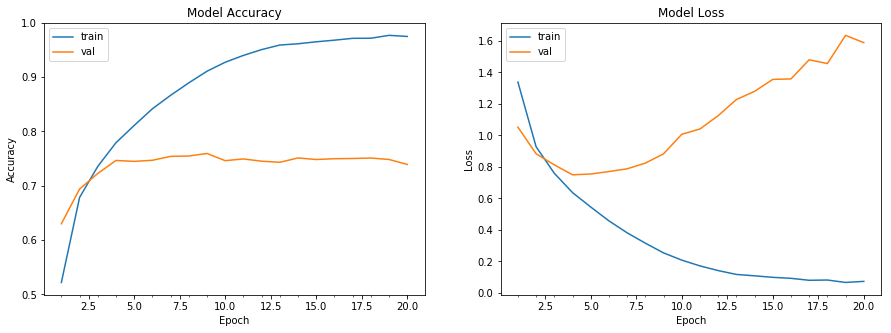

Training MLP took 192.54243516921997 seconds


In [60]:
train(model13, 128, 20,(x_train, Y_train),(x_test, Y_test),(x_test, Y_test))

<a id='bnorm'></a>
**Comments:**
* Batch mean standard normalization has been applied. Z-score type effect.
* Accuracy has improved, taking into account that no regularization has been applied yet.
* The next model will add regularization n order to improve this one.

<br>

[<a href='#top'>Return to top</a>]

## 3.6. Dataset mean normalization + Callback:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 8, 8, 128)         73856     
__________

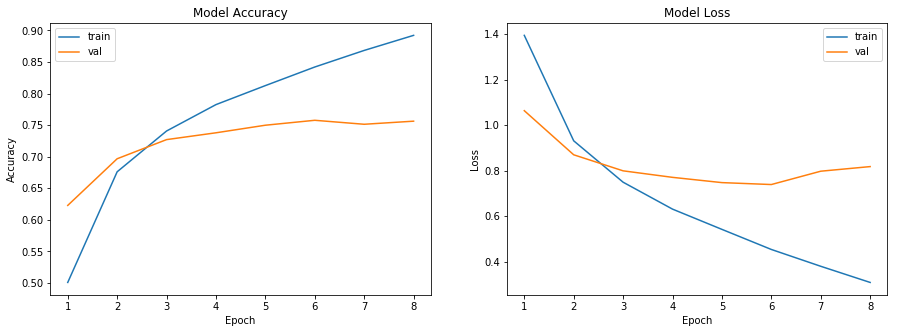

Training MLP took 78.24430179595947 seconds


In [63]:
# Convolutional Neural Networks (CNN)
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

callbacks = [EarlyStopping(monitor='val_loss', patience=2),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

model14 = Sequential()
model14 .add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model14 .add(LeakyReLU(alpha=0.1))
model14 .add(MaxPooling2D((2, 2),padding='same'))
model14 .add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model14 .add(LeakyReLU(alpha=0.1))
model14 .add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model14 .add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model14 .add(LeakyReLU(alpha=0.1))                  
model14 .add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model14 .add(Flatten())
model14 .add(Dense(64, activation='linear'))
model14 .add(LeakyReLU(alpha=0.1))                  
model14 .add(Dense(num_classes, activation='softmax'))
model14 .compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model14 .summary()

start = time.time()
history = model14 .fit(x_train, Y_train, batch_size=128,callbacks=callbacks, epochs=20, verbose=1, validation_data=(x_test, Y_test))
end = time.time()

loss, acc = model14.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

<a id='bnormreg'></a>
**Comments:**
* Best result uptil now has been achieved with reduced overfitting.
* Adding further regularization could improve the model, however 'Network in Network' type architecture will be tested next.

<br>

[<a href='#top'>Return to top</a>]

## 3.7. Network-in-Network type architecture:

In [67]:
# Convolutional Neural Networks (CNN)
'''
############################################################################

Based on the work of 
Min Lin, Qiang Chen, Shuicheng Yan. Network In Network (2013)

############################################################################

'''
import keras
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.initializers import RandomNormal  
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.callbacks import LearningRateScheduler, TensorBoard

batch_size    = 128
epochs        = 60
iterations    = 391
num_classes   = 10
dropout       = 0.5
weight_decay  = 0.0001

from keras import backend as K
if('tensorflow' == K.backend()):
    import tensorflow as tf
    from keras.backend.tensorflow_backend import set_session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)

def scheduler(epoch):
    if epoch <= 60:
        return 0.05
    if epoch <= 120:
        return 0.01
    if epoch <= 160:    
        return 0.002
    return 0.0004


model = Sequential()
model.add(Conv2D(192, (5, 5), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(160, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(96, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding = 'same'))
model.add(Dropout(dropout))
model.add(Conv2D(192, (5, 5), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(192, (1, 1),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(192, (1, 1),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding = 'same'))
model.add(Dropout(dropout))
model.add(Conv2D(192, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(192, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(10, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()


callbacks = [EarlyStopping(monitor='val_loss', patience=5),ModelCheckpoint(filepath='NetinNet.h5', monitor='val_loss', save_best_only=True)]


# set data augmentation
print('Using real-time data augmentation.')
datagen = ImageDataGenerator(horizontal_flip=True,width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)
datagen.fit(x_train)

# start training
model.fit_generator(datagen.flow(x_train, Y_train,batch_size=batch_size),steps_per_epoch=iterations,epochs=epochs,callbacks=callbacks,validation_data=(x_test, Y_test))
model.save('NetinNet.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 32, 32, 192)       14592     
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 192)       768       
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 192)       0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 32, 32, 160)       30880     
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 160)       640       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 160)       0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 32, 32, 96)        15456     
__________

<a id='nin'></a>
**Comments:**
* Best result uptil now has been achieved (80.19%). This model too could return higher accuracy if trained for a larger number of epochs.
* Adding further regularization could also improve the model.

<br>

[<a href='#top'>Return to top</a>]

## 3.8. VGG-16 Type architecture:

In [13]:
'''
############################################################################

Based on the work of 
Karen Simonyan, Andrew Zisserman. 
Very Deep Convolutional Networks for Large-Scale Image Recognition (2014)

############################################################################
'''

# Convolutional Neural Networks (CNN)

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

batch_size    = 128
epochs        = 60
iterations    = 391
num_classes   = 10
dropout       = 0.5
weight_decay  = 0.0001

from keras import backend as K
if('tensorflow' == K.backend()):
    import tensorflow as tf
    from keras.backend.tensorflow_backend import set_session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)


weight_decay  = 0.0001

model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.load_weights('cifar10vgg.h5',by_name=True)

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()



callbacks = [EarlyStopping(monitor='val_loss', patience=5),ModelCheckpoint(filepath='vgg16_v1.h5', monitor='val_loss', save_best_only=True)]


# set data augmentation
print('Using real-time data augmentation.')
datagen = ImageDataGenerator(horizontal_flip=True,width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)
datagen.fit(x_train)

# start training
model.fit_generator(datagen.flow(x_train, Y_train,batch_size=batch_size),steps_per_epoch=iterations,epochs=epochs,callbacks=callbacks,validation_data=(x_test, Y_test))
model.save('vgg16_1.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_61 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_57 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_41 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_62 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_58 (Batc (None, 32, 32, 64)        256       
__________

Epoch 1/60
391/391 [==============================] - 88s 226ms/step - loss: 7.5323 - acc: 0.1876 - val_loss: 7.8396 - val_acc: 0.1153
Epoch 2/60
391/391 [==============================] - 78s 200ms/step - loss: 6.7566 - acc: 0.2499 - val_loss: 6.7269 - val_acc: 0.1466
Epoch 3/60
391/391 [==============================] - 78s 200ms/step - loss: 5.9581 - acc: 0.3136 - val_loss: 7.6088 - val_acc: 0.1157TA: 2s - loss: 5.9668
Epoch 4/60
391/391 [==============================] - 78s 200ms/step - loss: 5.3128 - acc: 0.3542 - val_loss: 5.0421 - val_acc: 0.3625
Epoch 5/60
391/391 [==============================] - 78s 201ms/step - loss: 4.7939 - acc: 0.3744 - val_loss: 5.0604 - val_acc: 0.2505
Epoch 6/60
391/391 [==============================] - 78s 201ms/step - loss: 4.3873 - acc: 0.4015 - val_loss: 4.6554 - val_acc: 0.3036
Epoch 7/60
391/391 [==============================] - 78s 201ms/step - loss: 4.2520 - acc: 0.3988 - val_loss: 7.0813 - val_acc: 0.1992
Epoch 8/60
391/391 [==============

<a id='vgg1'></a>
**Comments:**
* This model shows great improvement over the previous one. Based on the work of Simonyan & Zisserman (2015), adding (3,3) filters in more quantity of convolutional layers yields better results.
* More epochs will for sure provide absolute best results.

<br>

[<a href='#top'>Return to top</a>]

## 3.9. VGG-16 type architecture with more epochs:

In [14]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

batch_size    = 128
epochs        = 100
iterations    = 391
num_classes   = 10
dropout       = 0.5
weight_decay  = 0.0001


from keras import backend as K
if('tensorflow' == K.backend()):
    import tensorflow as tf
    from keras.backend.tensorflow_backend import set_session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)


weight_decay  = 0.0001

model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.load_weights('cifar10vgg.h5',by_name=True)

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()



callbacks = [EarlyStopping(monitor='val_loss', patience=10),ModelCheckpoint(filepath='best_vgg16.h5', monitor='val_loss', save_best_only=True)]


# set data augmentation
print('Using real-time data augmentation.')
datagen = ImageDataGenerator(horizontal_flip=True,width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)
datagen.fit(x_train)

# start training
start = time.time()
history = model.fit_generator(datagen.flow(x_train, Y_train,batch_size=batch_size),steps_per_epoch=iterations,epochs=epochs,callbacks=callbacks,validation_data=(x_test, Y_test))
model.save('vgg16_2.h5')
end = time.time()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_76 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_71 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_51 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_77 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_72 (Batc (None, 32, 32, 64)        256       
__________

Epoch 1/100
391/391 [==============================] - 84s 215ms/step - loss: 7.3980 - acc: 0.1878 - val_loss: 9.0953 - val_acc: 0.1452 1s - loss: 7.4047 - acc: 0
Epoch 2/100
391/391 [==============================] - 79s 201ms/step - loss: 6.5782 - acc: 0.2729 - val_loss: 8.4246 - val_acc: 0.1413ETA: 0s - loss: 6.5806 - acc: 0.27
Epoch 3/100
391/391 [==============================] - 79s 201ms/step - loss: 5.8000 - acc: 0.3301 - val_loss: 6.3083 - val_acc: 0.2007
Epoch 4/100
391/391 [==============================] - 78s 201ms/step - loss: 5.3142 - acc: 0.3355 - val_loss: 5.6511 - val_acc: 0.2184 l - ETA: 5s - loss: 5.3099 - - ETA: 3s - loss: 5.3147 - acc: 0. - ETA: 2s - loss: 5.315
Epoch 5/100
391/391 [==============================] - 79s 201ms/step - loss: 5.0943 - acc: 0.2873 - val_loss: 5.4181 - val_acc: 0.2065
Epoch 6/100
391/391 [==============================] - 78s 201ms/step - loss: 4.6703 - acc: 0.3156 - val_loss: 6.2565 - val_acc: 0.2701
Epoch 7/100
391/391 [==============

Test loss: 0.8953941164016723
Test accuracy: 0.8592


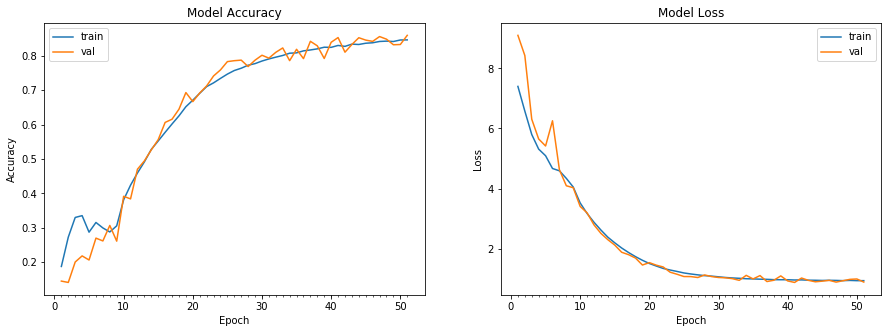

In [16]:
loss, acc = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)



<a id='vgg2'></a>
**Comments:**
* More epochs yields the best results from all of the networks tested.
* Even more epochs provides higher accuracy: 

<br>

[<a href='#top'>Return to top</a>]

In [20]:
history2 = model.fit_generator(datagen.flow(x_train, Y_train,batch_size=batch_size),steps_per_epoch=iterations,epochs=epochs,callbacks=callbacks,validation_data=(x_test, Y_test))


Epoch 1/100
391/391 [==============================] - 79s 201ms/step - loss: 0.9425 - acc: 0.8469 - val_loss: 1.0480 - val_acc: 0.8227
Epoch 2/100
391/391 [==============================] - 79s 201ms/step - loss: 0.9444 - acc: 0.8496 - val_loss: 0.9007 - val_acc: 0.8646s: 0.9446 -
Epoch 3/100
391/391 [==============================] - 79s 201ms/step - loss: 0.9451 - acc: 0.8497 - val_loss: 0.8905 - val_acc: 0.8665s - loss: 0.9450 - acc: 0
Epoch 4/100
391/391 [==============================] - 79s 201ms/step - loss: 0.9380 - acc: 0.8536 - val_loss: 0.9671 - val_acc: 0.8431
Epoch 5/100
391/391 [==============================] - 81s 207ms/step - loss: 0.9374 - acc: 0.8507 - val_loss: 0.9512 - val_acc: 0.8511
Epoch 6/100
391/391 [==============================] - 83s 211ms/step - loss: 0.9380 - acc: 0.8543 - val_loss: 0.9627 - val_acc: 0.8537
Epoch 7/100
391/391 [==============================] - 81s 207ms/step - loss: 0.9349 - acc: 0.8567 - val_loss: 0.9982 - val_acc: 0.8389
Epoch 8/100


In [27]:
history3 = model.fit_generator(datagen.flow(x_train, Y_train,batch_size=batch_size),steps_per_epoch=iterations,epochs=1,callbacks=callbacks,validation_data=(x_test, Y_test))


Epoch 1/1
391/391 [==============================] - 79s 202ms/step - loss: 0.9351 - acc: 0.8729 - val_loss: 0.9219 - val_acc: 0.8786- loss - ETA: 0s - loss: 0.9353 - acc: 0.8
